# Пересечение прямоугольника с множеством непересекающихся отрезков

## Мотивация
Для решения задач вычислительной геометрия часто как вспомогательный прием используется метод заключения объекта в параллелипипед минимального размера (англ. bounding box), стороны которого параллельны осям системы координат(англ. axis-aligned). В связи с этим полезным становится уметь решать следующую задачу.

### Задача 
Дано множество непересекающихся отрезков в $R^2$. Нужно уметь отвечать на запросы, какие из них пересекают границу данного axis-aligned прямоугольника.

## Деверо отрезков (англ. [Segment tree](https://en.wikipedia.org/wiki/Segment_tree))
Для решения поставленной задачи воспользуемся структурой данных, называющейся деревом отрезков. Чтобы избежать путаницы из-за русскоязычной терминологии, сразу обратим внимание, что речь идет не о той [структуре данных](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BE%D1%82%D1%80%D0%B5%D0%B7%D0%BA%D0%BE%D0%B2), позволяющей эффективно отвечать на запросы вычисления некоторой ассоциативной функции на отрезке, которую рассматривают в классическом курсе структур данных.

Рассмотрим вещественную ось, структура данных должна уметь отвечать на запросы о поиске отрезков, содержащих точку $q_{x}$. Пусть $I = \{[x_1 : x_{1}'], [x_2 : x_{2}'], ..., [x_n : x_{n}']\}$ - множество отрезков на оси. Возьмем уникальные концы этих отрезков и отсортируем их по возрастанию, получим точки $p_1, p_2, ..., p_m$$(m\leqslant 2n)$. Назовем множеством _элементарных_ _интервалов_ $E = \{ (-\infty : p_1), [p_1 : p_1], (p_1 : p_2),[p_2 : p_2], ..., (p_{m-1} : p_{m}), [p_m : p_m],(p_m : +\infty) \}$. 
![Разбиение оси](img/R.png)
Причиной, по которой мы выделяем границы в отдельный интервал, является то, что ответ для внутренней части отрезка не обязательно совпадает с ответом для границы.(**TODO пример**) 

Построим ~~сбалансированное~~ бинарное дерево $T$, листам которого будут соответствовать элементарные интервалы, а внутренним вершинам — объединения интервалов в потомках. Будем обозначать $Int(\mu)$ интервал, соответствующий листу $\mu$. 

Пусть все отрезки из $I$, содержащиеся в $Int(\mu)$, хранятся в листе $\mu$. Тогда мы можем найти $k$ отрезков, содержащих $q_{x}$, за время $O(log(n) + k)$: находим за $O(log(n))$ лист, содержащий $q_{x}$, затем за $O(k)$ возвращаем все отрезки из этого листа. Отвечать мы можем эффективно, но что насчет потребляемой памяти? Отрезки, которые перекрывают много элементарных интервалов, будут храниться во многих листах. Значит, потребляемый объем будет расти, если много пар перекрывающихся отрезков. В худшем случае будет достигнут квадратичный объем памяти. Посмотрим, как мы можем это улучшить.   

Разберем на примере.  ![Общий предок](img/lca.png)
Рассмотрим листы $\mu1$, $\mu2$, $\mu3$, $\mu4$. Если $q_{x}$ принадлежит одному из этих интервалов, мы должны возвращать отрезок $s$. Заметим, что спуск по дереву поиска заканчивается в любой из этих вершин тогда и только тогда, когда мы проходим через вершину $v$. Поэтому давайте хранить $s$ в $v$ (и $\mu5$) вместо $\mu1$, $\mu2$, $\mu3$, $\mu4$ (и $\mu5$). В общем случае мы храним отрезок в минимальном количестве вершин, для которых объединение соответствующих интервалов будет покрывать данный отрезок и только его. 

![Пример дерева отрезков](img/ex_seg_tree.png)

### Свойства:
Давайте теперь полностью опишем итоговые свойства нашей структуры.

* Каркас дерева представляет собой бинарное сбалансированное дерево $T$. Листья $T$ соответствуют элементарным интервалам, индуцированным отсортированными границами $I$: самый левый лист - самому левому интервалу и тд.
* Внутренней вершине $v$ дерева $T$ соответствует интервал, являющийся объединением интервалов листов в поддереве, корнем которого она является. Т.е. $Int(v)$ является объединением интервалов двух своих детей.
* Каждая вершина $v$ в $T$ хранит(например, в связном списке) в себе $Int(v)$ и множество отрезков, таких что $I(v) \subseteq I$ , где $\forall [x : x'] \in I(v) : Int(v) \subseteq [x : x'], Int(parent(v)) \not\subseteq [x : x']$. Назовем $I(v)$ каноническим множеством для вершины $v$.

### Лемма (Оценка на память)
>Дерево отрезков занимает $O(log(n))$ памяти.

$\triangleright$
<div style="padding-left:40px">
Так как дерево бинарное сбалансированно и имеет не больше $4n + 1$ вершин, то его высота $O(log(n))$. Утверждается, что любой отрезок $[x : x']\in I$ хранится не более, чем в двух вершинах на одной глубине дерева $T$. Действительно, пусть есть три вершины $v_1$, $v_2$, $v_3$ на одной глубине.
![](img/log_mem.png)
Предположим, что $v_1$ и $v_3$ содержат $[x : x']$. Это означает, что $[x : x']$ покрывает весь интерввл от левой границы $Int(v_1)$ до правой границы $Int(v_3)$. Так как $v_2$ лежит между $v_1$ и $v_3$, то $Int(parent(v_{2})$ необходимо содержится в $[x : x']$, а значит, $[x : x']$ не должен храниться в $v_2$. Противоречие. 
</div>
$\triangleleft$

### Построение дерева

Сначала мы сортируем точки границ отрезков из $I$ и получаем элементарные интервалы. Затем строим по ним бинарное сбалансированное дерево и определяем для каждой вершины $v$ интервал $Int(v)$, который она представляет. Далее определим для вершин их канонические множества: будем по очереди вставлять каждый отрезки из $I$ используя процедуру, описанную далее в виде псевдокода, запускать которую будем от корня дерева $T$.

**InsertSegmentTree**$(v, [x:x']):$<br>
**if** $Int(v) \subseteq [x:x']$<br>
..**then** store $[x:x']$ at $v$<br>
**else  if** $Int(LeftChild(v)) \cap [x:x'] \neq \varnothing$ <br>
..........          **then** $InsertSegmentTree(LeftChild(v), [x:x'])$ <br>
.......       **if** $Int(rightchild(v)) \cap [x:x'] \neq \varnothing$<br>
.........          **then** $InsertSegmentTree(RightChild(v), [x:x'])$<br>

В результате получим структуру данных, удовлетворяющую всем необходимым свойствам.

### Лемма (Оценка времени построения)
>Дерево отрезков можно построить за время $O(nlog(n))$.

$\triangleright$
<div style="padding-left:40px">
Сортировку точек можно выполнить за время $O(nlog(n))$. Построить сбалансированное дерево и выставить соответствующие вершинам интервалы можно за линейное время, используя подъем снизу вверх(англ. bottom-up) от листьев, т.е. запуском от корня рекурсивного спуска с выставлением состояния вершине по ее детям перед выхом из нее. Наибольший интерес создание канонических множеств. Сколько же занимает вставка отрезка $[x:x']$ в дерево? Предполагая, что $I(v)$ мы храним в такой структуре наподобие связного списка, при посещении вершины мы тратим константное количество времени. Оказавшись в вершине, мы либо сохраняем в ней $[x:x']$, либо ее интервал содержит один из концов $[x:x']$. Выше мы уже доказывали, что на одной глубине дерева $T$ отрезок хранится не более чем в двух вершинах. Так же на одной глубине не более одной вершины, чей интервал содержит $x$, аналогично с $x'$. Таким образом, на каждом уровне мы посещаем не более четырех вершин, а так как глубина дерева равна $log(n)$, то вставка одного отрезка займет $O(log(n))$. А тогда суммарная асимптотика времени построения дерева отрезков будет $O(nlog(n))$.</div>
$\triangleleft$

### Упражнение
Для закрепления материала выполните небольшие упражнения.

#### Задание 2
Легко заметить, что для внутренней вершины $v$ дерева отрезков $Int(v)$ всегда является открытым слева полуинтервалом. Вам необходимо написать функцию, которая определяет положение отрезка $seg$ относительно полуинтервал $int$. Если $seg \subset int$ функция должна возвращать строку **_"contains"_**, если $seg \cap int \ne \varnothing$, но $seg \not\subset int$, то строку **_"intersects"_**, строку **_"does not intersect"_** иначе.

Неправильный ответ!!!
Ваш ответ:  None
Не обращайте внимания на ось Оу. Она приведена только для наглядности.


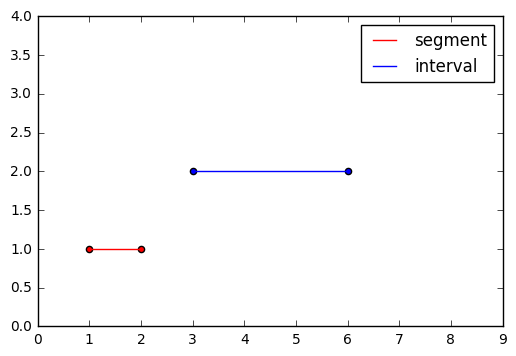

In [1]:
import relation_checker

def relation(segment, interval):
    # Рассатривайте параметры функции как двух элементные массивы, например,
    # segment[0] - координата по начала отрезка, segment[0] - координата конца отрезка.
    #
    # Считайте, что координаты концов всегда корректные.
    #
    # Напиишите ваш код здесь.
    pass

relation_checker.test(relation)

### Лемма(Запрос в дереве отрезков)
>С помощью дерева отрезков можно отвечать на запросы о поиске всех отрезков, содержащих точку $q_{x}$, за время $O(log(n) + k)$, где k - количество отрезков в ответе.

$\triangleright$
<div style="padding-left:40px">
Запрос о поиске отрезков, которые содержат точку $q_{x}$ можно описать следующим псевдокодом процедуры, которая запускаяется от корня и точки запроса:

**QuerySegmentTree**$(v, q_{x}):$<br>
print all intervals in $Int(v)$<br>
**if** $v$ is not a leaf<br>
..**then if** $q_{x} \in Int(LeftChild(v))$<br>
..........**then** $QuerySegmentTree(LeftChild(v),q_{x})$<br>
..........**else** $QuerySegmentTree(RightChild(v),q_{x})$<br>

На каждом уровне дерева $T$ алгоритм посещает ровно одну вершину, поэтому время на обход вершин $O(log(n)$. Для каждой вершины $v$ мы тратим $O(k_{v})$ времени, где $k_{v}$ - количество искомых в отрезков в вершине $v$, чтобы сообщить об этих отрезках. Откуда и получается суммарное время $O(log(n) + k)$, где k - количество отрезков в ответе.</div>
$\triangleleft$

Собирая вместе полученные выше результаты, приходим к следующей теореме.  

### Теорема (О поиске всех отрезков, содержащих точку)
>Дерево отрезков для множества $I$ из $n$ отрезков можно построить за время $O(nlog(n))$, и оно будет занимать $O(nlog(n))$ памяти. Исползуя его, можно находить все отрезки, содержащие точку $q_{x}$, за время $O(log(n) + k)$, где k - количество отрезков в ответе.

## Применение дерева отрезков

Вернемся теперь к заявленной в самом начале задаче. Пусть $S$ - множество случайно направленных непересекающихся отрезков на плоскости. Мы хотим уметь находить все отрезки, которые пересекают вертикальный отрезок $q = q_{x}\times[q_{y}:q_{y}']$. Для горизонтального отрезка $q = [q_{x}:q_{x}']\times q_{y}$ задача будет решаться по аналогии.

Давайте посмотрим, что мы получим, если построим дерево отрезков на $Ox$ проекциях отрезков из $S$. Вершина $v$ в дереве $T$ может быть интерпретирована как вертикальная полоса $Int(v)\times(-\infty:+\infty)$. Пусть отрезок полностью пересекает вертикальную полосу, соответствующую вершине $v$, но полосу родителя вершины $v$ он полностью не пересекает, тогда он входит в каноническое подмножество для вершины $v$, обозначим его $S(v)$. 
![](img/canonical_subset_for_r2.png)
Когда мы ищем $q_{x}$ в $T$, мы находим $O(log(n))$ канонических подмножеств из тех вершин, которые нам встречаются на пути. Вместе они образуют множество всех отрезков, проекции на ось $Ox$ которых содержат точку $q_{x}$. В пределах одной вертикальной полосы для вершины $v$ мы можем воспользоваться тем фактом, что отрезки из канонического подмножества не пересекаются и польностью перекрывают полосу, откуда следует, возможность задания вертикального порядка на елементах канонического подмножества. Все отрезки между самым верхним и самым нижним отрезками, пересекающими $q$, тоже необходимо пересекают $q$. Поэтому будем хранить $S(v)$ в сбалансированном дереве поиска  $\tau(v)$ на вертикальном порядке. Таким образом, для вершины $v$ поиск отрезков, пересекающих $q$ занимает $O(log(n) + k_{v})$ времени, где $k_{v}$ - количество пересекающих отрезков.     
![](img/vertical_order.png)

### Свойства
Прорезюмируем требуемые от нашей структуры данных свойства:
* Множество $S$ хранится в дереве отрезков, основанном на горизонтальных проекциях отрезков из него.
* Каноническое подмножество для вершины $v$(состоящее из отрезков, которые полностью перекрывают вертикльную полосу для $v$, но не для ее родителя) хранится в сбалансированном дереве поиска $\tau(v)$, основанном на вертикальном порядке в пределах вертикальной полосы. 

### Оценка на время построения

Так как ассоциированное с каждой вершиной дерево поиска занимает линейное по отношению к $S(v)$ количество памяти, то суммарные затраты на память по-прежнему $O(nlog(n)$. Для каждой вершины дерево может быть построео за $O(nlog(n)$, откуда следует увеличение времени препроцессинга до $O(nlog^2(n))$. Однако, если задать частичный вертикальный порядок на отрезках во время построения дерева отрезков, то можно созранить прежнюю суммарную асимптотику $O(nlog(n))$.  

### Выполнение запросов

Алгоритм для поиска всех пересекающих $q$ отрезков довольно прост: как и в предыдущей задаче мы ищем $q_{x}$ в дереве отрезков, но теперь в каждой вершине $v$ на пути находим верхную и нижнюю границы(англ. lower and upper bound) пересечения с $q$, и возвращем отрезки $S(v)$ из этого промежутка.     

#### Оценка на время

Поиск в $\tau(v)$ занимает $O(log(n) + k_{v})$ времени, где $k_{v}$ - количество отрезков для $v$. Таким образом, суммарное время на запрос $O(log^2(n) + k)$.

Собирая вместе полученные факты, сформулируем несколько теорем.

### Теорема (О пересечении вертикального(горизонтального) отрезка с множеством непересекающихся отрезков)
>Пусть $S$ - множество непересекающихся отрезков на плоскости.Отрезки, пересекающие заданный вертикальный отрезок, могут быть найдены за время $O(log^2(n) + k)$ структурой данных, использующей $O(nlog(n))$ памяти, где $k$ - количество отрезков в ответе. Структура данных может быть построена за $O(nlog(n))$ времени.

Такой же подход можно применить к отрезкам, которые имеют непересекающиеся внутренности, но могут иметь общие границы.

### Теорема (О пересечении прямоугольника с множеством непересекающихся по внутренностям отрезков)
>Пусть $S$ - множество отрезков на плоскости с непересекающимися внутренностями. Отрезки, пересекающие прямоугольник, стороны которого параллельны осям координат, могут быть найдены за время $O(log^2(n) + k)$ структурой данных, использующей $O(nlog(n))$ памяти, где $k$ - количество отрезков в ответе. Структура данных может быть построена за $O(nlog(n))$ времени.

$\triangleright$
<div style="padding-left:40px">
Для каждой стороны прямоугольника воспользуемся предыдущей теоремой. Никакие оценки не изменятся, поэтому получим требуемый результат. 
</div>
$\triangleleft$